# Tarea 5: Análisis de imágenes
* Materia: Procesamiento de datos
* Alumno: Fernando Barajas
* Matrícula: 2085375

En este trabajo se realiza una revisión de 2 librerías utilizadas para el análisis de imágenes. Las librerías empleadas para este código son:
1. Python Image Library (Pillow/PIL)
2. ITK

Personalmente, he utilizado ITK antes en otro lenguaje de programación, por lo que me llama la atención revisar como se adaptan estas librerías para el análisis de imágenes en python.

## 1. Pillow

En PIL, la mayoría de las tareas son bastante directas. Los comandos son muy intuitivos para realizar cualquier manipulación de las imagenes, aplicar filtros, etcétera. Con lo revisado, se ve que hay mucha variedad para la manipulación de las imágenes por medio de código, y tiene funciones que asemejan a lo que se puede lograr con photoshop, por ejemplo.

In [66]:
# Importar librerias de PILLOW
from PIL import ImageTk, Image
import matplotlib.pyplot as plt

# Imagen de fondo
filename = 'G:\My Drive\MCD UANL\TRABAJO CLASE\MATERIAS\(T4) Procesamiento de Datos\ProcesamientoFCFM\Tarea 4\space2.jpg'
with Image.open(filename) as bg:
    bg.load()

type(bg)
isinstance(bg, Image.Image)

True

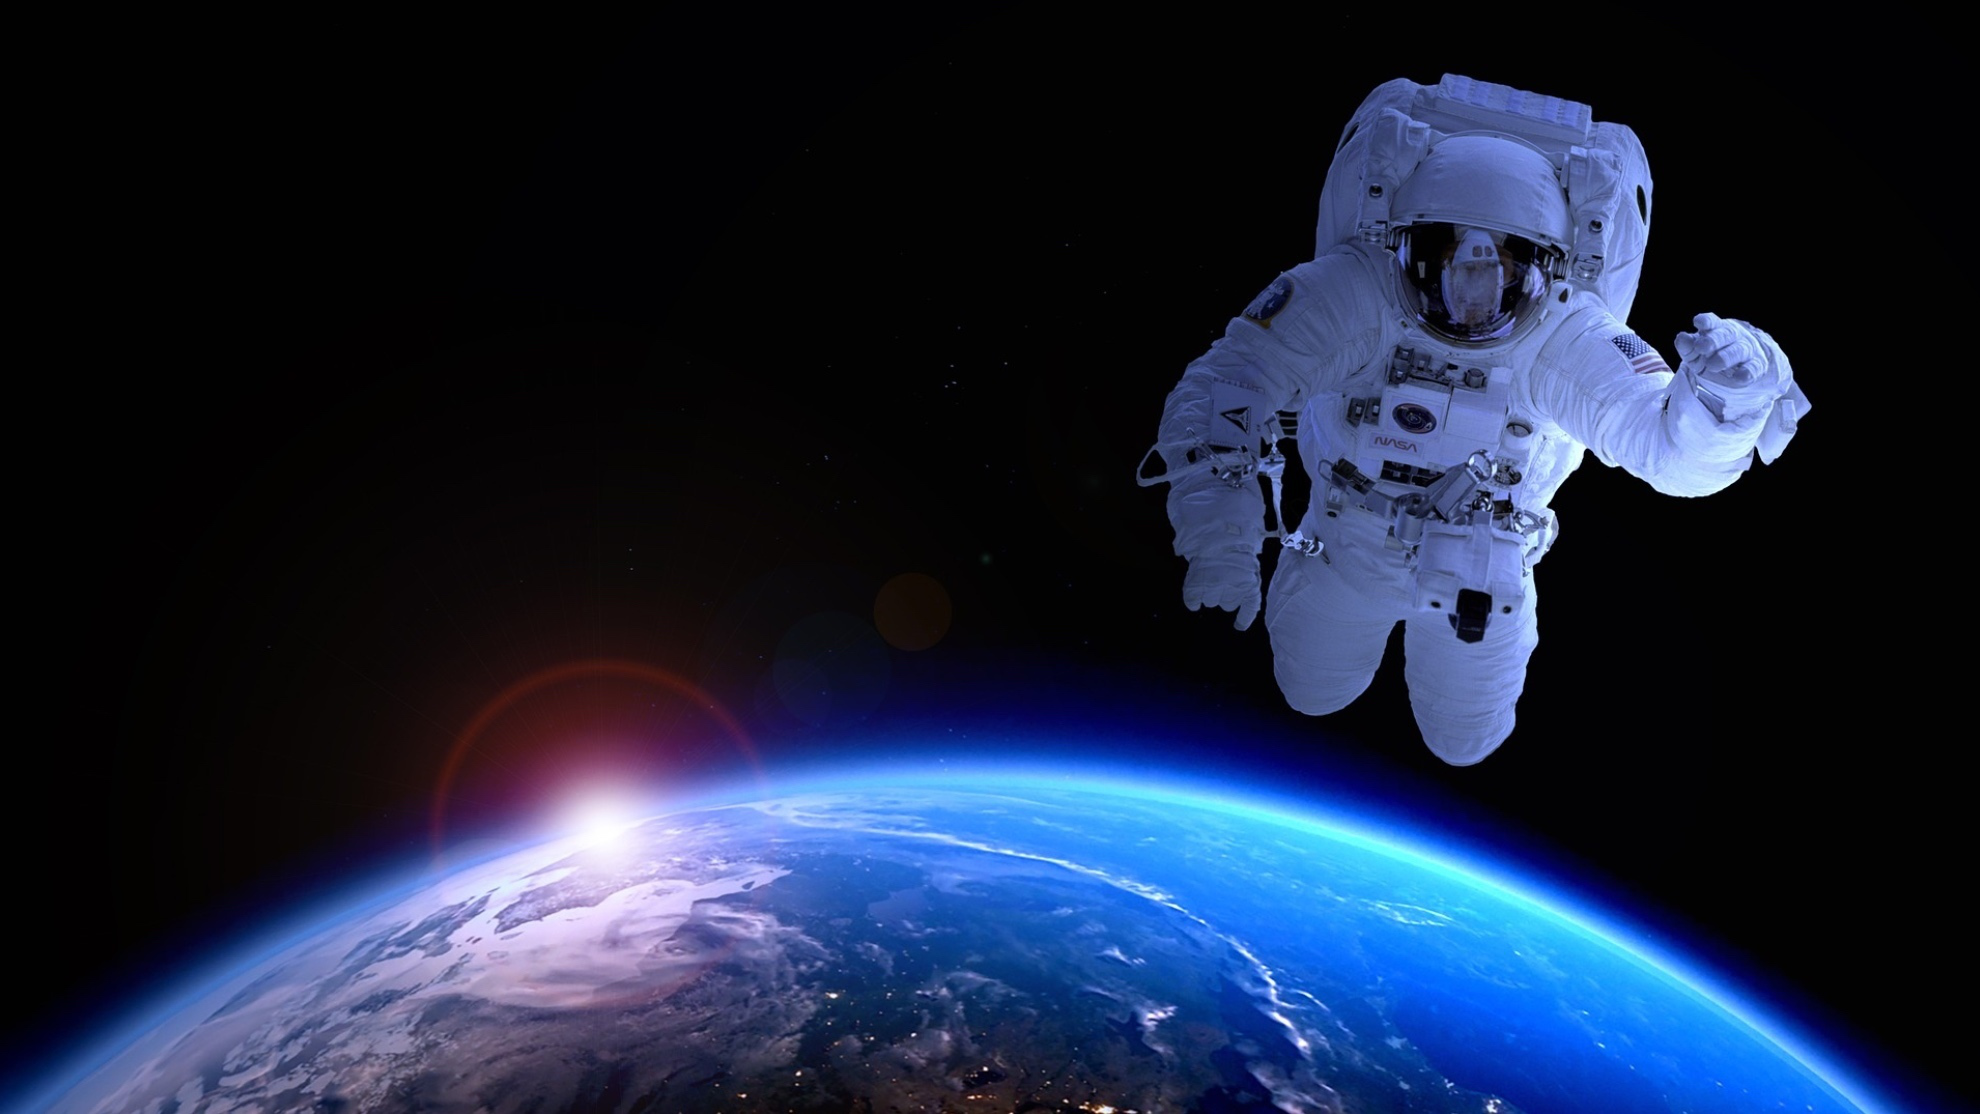

In [67]:
# Esta es la imagen de fondo con la que se va a trabajar
bg

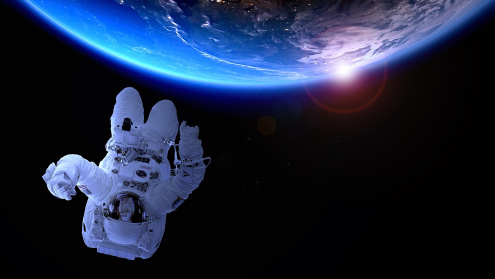

In [68]:
# Aplicar filtros a la imagen
from PIL import Image, ImageFilter

# Filtro de "SHARPEN", para hacer disminuir el suavizado entre las transiciones de las diferentes áreas de la imagen. 
bg.sharp = bg.filter(ImageFilter.SHARPEN)
bg.rotate = bg.sharp.rotate(180)

# Reducir tamaño de imagen a la mitad
bg.reduce = bg.rotate.reduce(4)
bg.reduce

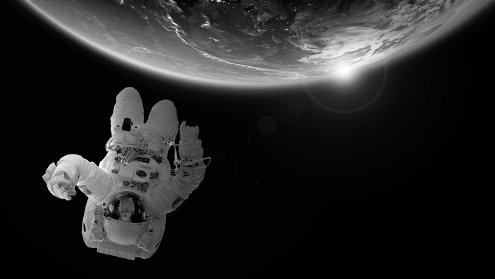

In [69]:
# Escala de grises
bg.gray = bg.reduce.convert("L")
bg.gray

In [70]:
print(bg.reduce.getbands())
# print(cmyk_img.getbands())
print(bg.gray.getbands())

('R', 'G', 'B')
('L',)


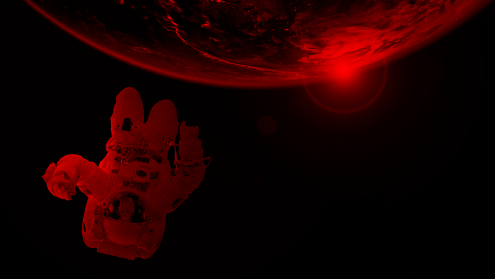

In [71]:
# Separación de canales de colores
red, green, blue = bg.reduce.split()

zeroed_band = red.point(lambda _: 0)

red_merge = Image.merge("RGB", (red, zeroed_band, zeroed_band))
green_merge = Image.merge("RGB", (zeroed_band, green, zeroed_band))
blue_merge = Image.merge( "RGB", (zeroed_band, zeroed_band, blue))

# Ejemplo de la imagen con un filtro rojo:
red_merge

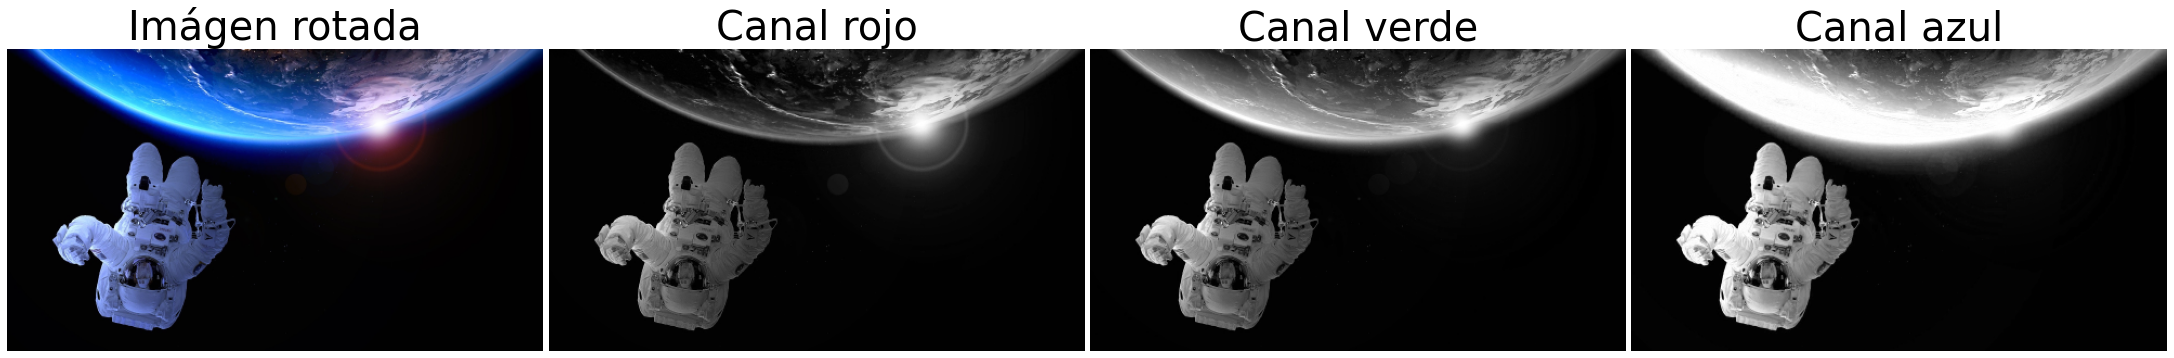

In [72]:
# Comparativa de la imágen original y la información que se muestra en cada uno de los canales
fig = plt.figure(figsize=(30,30))
ax1 = fig.add_subplot(1,4,1)
ax1.imshow(bg.reduce); plt.axis('off'); plt.title("Imágen rotada", fontdict={'fontsize': 40})
ax2 = fig.add_subplot(1,4,2)
ax2.imshow(red, cmap='gray'); plt.axis('off'); plt.title("Canal rojo", fontdict={'fontsize': 40})
ax3 = fig.add_subplot(1,4,3)
ax3.imshow(green, cmap='gray'); plt.axis('off'); plt.title("Canal verde", fontdict={'fontsize': 40})
ax4 = fig.add_subplot(1,4,4)
ax4.imshow(blue, cmap='gray'); plt.axis('off'); plt.title("Canal azul", fontdict={'fontsize': 40})

plt.gca().set_axis_off()
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, 
            hspace = 0, wspace = 0.01)

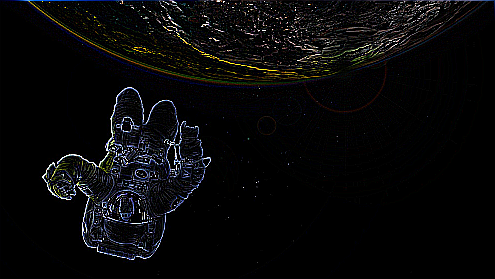

In [73]:
# Aplicación de filtro de detección de orillas
edges = bg.reduce.filter(ImageFilter.FIND_EDGES)
edges

In [74]:
# edges.rotate(45, expand=True)

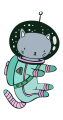

In [75]:
# Imagen que se superpone al fondo
filename = "G:\My Drive\MCD UANL\TRABAJO CLASE\MATERIAS\(T4) Procesamiento de Datos\ProcesamientoFCFM\Tarea 4\cat.png"
with Image.open(filename) as cat:
    cat.load()
# Reducir de tamaño la imagen. 10 veces más pequeña que la original
reduce_cat = cat.reduce(10)
reduce_cat

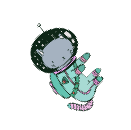

In [76]:
# Rotar 45 grados la imagen
rotate_cat = reduce_cat.rotate(45, expand=True)
rotate_cat

In [77]:
# Tamaño de imagen de fondo:
print("Tamaño de imágen de fondo: ", edges.size)
# Tamaño de la imagen superpuesta
print("Tamaño de imágen superpuesta: ", rotate_cat.size)

Tamaño de imágen de fondo:  (495, 279)
Tamaño de imágen superpuesta:  (131, 130)


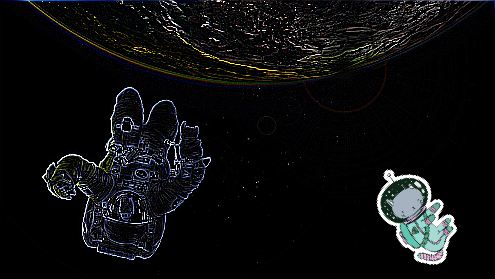

In [78]:
# Generar la máscara de la imagen
back_im = edges.copy()
back_im.paste(rotate_cat, (350,150),rotate_cat)
back_im

## 2. ITK

Por otra parte, se utiliza Simple ITK es una versión simplificada del Insight Toolkit (ITK), mayormente utilizado para el análisis de imágenes médicas.

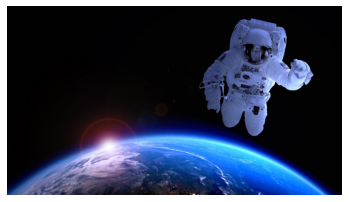

In [79]:
import SimpleITK as sitk
import numpy as np

# De inicio, se recomienda un programa externo como Fiji o ImageJ para guardar y visualizar las imágenes
bg_itk = sitk.ReadImage('G:\My Drive\MCD UANL\TRABAJO CLASE\MATERIAS\(T4) Procesamiento de Datos\ProcesamientoFCFM\Tarea 4\space2.jpg')
# En este caso utilizamos numpy para visualizar 
nda = sitk.GetArrayFromImage(bg_itk)
plt.imshow(nda)
plt.gca().set_axis_off()

En este caso, la librería contiene muchos métodos para explorar los atributos y la metadata de las imágenes, que normalmente son imágenes médicas. Aquí se muestra como revisamos el tamaño de la imágen, la orientación (muy importante con imágenes en 3D), la dirección y el número de componentes o canales por cada pixel (en este caso 3 como es una imágen a color).

In [80]:
print(bg_itk.GetSize())
print(bg_itk.GetOrigin())
print(bg_itk.GetSpacing())
print(bg_itk.GetDirection())
print(bg_itk.GetNumberOfComponentsPerPixel())

(1980, 1114)
(0.0, 0.0)
(0.08466666666666667, 0.08466666666666667)
(1.0, 0.0, 0.0, 1.0)
3


Al estar orientado a imágenes médicas, es posible visualizar el tipo de pixeles y el identificador de cada uno de estos, por ejemplo, si hablamos de un mapa de segmentación de imagen, en la que cada región segmentada se identifique con un ID distinto en los pixeles que la conforman.

In [81]:
print(bg_itk.GetPixelIDValue())
print(bg_itk.GetPixelIDTypeAsString())

13
vector of 8-bit unsigned integer


Para declarar una "transformación" de la imagen o manipular parámetros como la escala, rotación o traslación podemos pasar los parámetros exactos del número de pixeles que queremos modificar mediante parámetros fijos. Esto ofrece un gran control sobre la transformación aplicada a las imágenes, con el costo de un código más complejo para aplicar los diferentes cambios

Para este ejemplo se definen 3 tranformadas:
- Identidad: regresa la imágen original)
- Traslación: al ser una imagen 2D, implica un movimiento en los ejex vertical (y) y horizontal (x). Esto le aplica un "offset" a la imagen con respecto a su posición original.
- Afín: la transformada afín envuelve traslación, rotación, escalamiento y "shearing". Esta última consiste en mover una parte de la imagen en una dirección y otra mantiene sus coordenadas o posición original.

In [90]:
# TRASLACIÓN
offset = (50, 10)  # offset can be any vector-like data
translation = sitk.TranslationTransform(dimension, offset)
print(translation)
# En este caso, la traslación implica un movimiento, por lo que el punto se mueve

itk::simple::TranslationTransform
 TranslationTransform (000001FD0055A530)
   RTTI typeinfo:   class itk::TranslationTransform<double,2>
   Reference Count: 1
   Modified Time: 3840
   Debug: Off
   Object Name: 
   Observers: 
     none
   Offset: [50, 10]



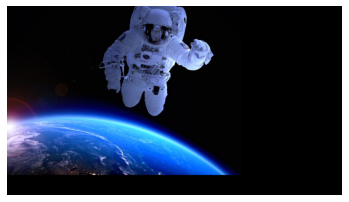

In [92]:
bg_itktras = sitk.Resample(bg_itk, bg_itk, translation)
nda_tras = sitk.GetArrayFromImage(bg_itktras)
plt.imshow(nda_tras)
plt.gca().set_axis_off()

En general, la librería de ITK representa una curva de aprendizaje más compleja, y requiere de otras librerías como numpy para poder manipular las imagenes, por lo que no incluye tantas funcionalidades propias.